In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pathlib
data_root = pathlib.Path("/Users/soumen/Downloads/Datasets/ActiveTerahertzImagingDataset/THZ_dataset_det_VOC")
img_root = data_root / "JPEGImages"
xml_root = data_root / "Annotations"
import cv2
patch_db = "customdataset/atz/atz_patch_dataset__3_128_36_v2_10%_30_99%_nomulti.csv"
df_patch = pd.read_csv(patch_db)

df_patch.head()

,Unnamed: 0,image,threat_present,front_back,patch_id,label,label_txt,global_x1y1x2y2,anomaly_size,x1x2y1y2,subject_gender,subject_id
0,0,S_P_M5_MD_F_W_SS_V_W_back_0906085926.jpg,1,back,1,0,NORMAL0,"(0, 0, 0, 0)",0,"(103, 231, 0, 128)",M,M5
1,1,S_P_M5_MD_F_W_SS_V_W_back_0906085926.jpg,1,back,2,0,NORMAL0,"(0, 0, 0, 0)",0,"(206, 334, 0, 128)",M,M5
2,2,S_P_M5_MD_F_W_SS_V_W_back_0906085926.jpg,1,back,3,0,NORMAL0,"(0, 0, 0, 0)",0,"(309, 437, 0, 128)",M,M5
3,3,S_P_M5_MD_F_W_SS_V_W_back_0906085926.jpg,1,back,4,0,NORMAL0,"(0, 0, 0, 0)",0,"(412, 540, 0, 128)",M,M5
4,4,S_P_M5_MD_F_W_SS_V_W_back_0906085926.jpg,1,back,5,0,NORMAL0,"(0, 0, 0, 0)",0,"(515, 643, 0, 128)",M,M5


In [2]:
def splitt(x):
    return pd.Series(x.strip(')').strip('(').split(',')).astype('int')

df_patch[['x1', 'x2', 'y1', 'y2']] = df_patch['x1x2y1y2'].apply(splitt)
df_patch[['gx1', 'gy1', 'gx2', 'gy2']] = df_patch['global_x1y1x2y2'].apply(splitt)


In [3]:
def areaa(x):
    gx1, gy1, gx2, gy2 = np.array(x.strip(')').strip('(').split(',')).astype(int)
    return (np.abs(gx1-gx2)*np.abs(gy1-gy2))
    

df_patch['global_area'] = df_patch['global_x1y1x2y2'].apply(areaa)
df_patch.sample(10)

,Unnamed: 0,image,threat_present,front_back,patch_id,label,label_txt,global_x1y1x2y2,anomaly_size,x1x2y1y2,...,subject_id,x1,x2,y1,y2,gx1,gy1,gx2,gy2,global_area
64418,64418,S_P_F3_CK_F_RT_WB_V_N_front_0910102849.jpg,1,front,27,0,NORMAL0,"(0, 0, 0, 0)",0,"(0, 128, 207, 335)",...,F3,0,128,207,335,0,0,0,0,0
11313,11313,D_P_M2_GA_F_LL_KK_F_RT_back_0904130506.jpg,1,back,24,0,NORMAL0,"(0, 0, 0, 0)",0,"(618, 746, 206, 334)",...,M2,618,746,206,334,0,0,0,0,0
8759,8759,S_N_M2_CL_R_RT_back_0904125858.jpg,0,back,1,0,NORMAL0,"(0, 0, 0, 0)",0,"(103, 231, 0, 128)",...,M2,103,231,0,128,0,0,0,0,0
76996,76996,S_N_M2_SS_F_RA_MD_V_RL_front_0904091614.jpg,0,front,22,0,NORMAL0,"(0, 0, 0, 0)",0,"(412, 540, 206, 334)",...,M2,412,540,206,334,0,0,0,0,0
84456,84456,S_P_M6_CK_F_W_WB_V_B_front_0906143929.jpg,1,front,3,0,NORMAL0,"(0, 0, 0, 0)",0,"(309, 437, 0, 128)",...,M6,309,437,0,128,0,0,0,0,0
74514,74514,S_N_M5_GA_L_W_front_0906100502.jpg,0,front,18,0,NORMAL0,"(0, 0, 0, 0)",0,"(0, 128, 206, 334)",...,M5,0,128,206,334,0,0,0,0,0
83871,83871,S_P_F2_CK_F_LT_WB_V_N_front_0907145315.jpg,1,front,23,13,CK,"(195, 501, 265, 562)",2880,"(515, 643, 206, 334)",...,F2,515,643,206,334,195,501,265,562,4270
49934,49934,T_P_M4_LW_F_LL_GA_F_W_SS_F_W_back_0905162201.jpg,1,back,14,0,NORMAL0,"(0, 0, 0, 0)",0,"(515, 643, 103, 231)",...,M4,515,643,103,231,0,0,0,0,0
51422,51422,S_P_M5_KK_R_RT_front_0906100619.jpg,1,front,4,0,NORMAL0,"(0, 0, 0, 0)",0,"(412, 540, 0, 128)",...,M5,412,540,0,128,0,0,0,0,0
92045,92045,S_N_M6_WB_L_W_back_0906152235.jpg,0,back,3,0,NORMAL0,"(0, 0, 0, 0)",0,"(309, 437, 0, 128)",...,M6,309,437,0,128,0,0,0,0,0


In [4]:
ls 

README.md
__pycache__/
anomaly_histogram.ipynb
checkpoint/
customdataset/
exp13_128x128_20230114_test__epoch24_histogram.csv
experiments/
histogram_script.sh
histogram_view.py
inference.py
lib/
mission_control.ini
obserbation/
options.py
output/
preprocessing/
requirements.txt
stone_detect/
train.py


In [5]:
df = pd.read_csv("exp13_128x128_20230114_test__epoch24_histogram.csv")
df.head()

,Unnamed: 0,scores,labels,x1,x2,y1,y2,label_txt,file_name
0,0,0.113403,0,tensor(618),tensor(746),tensor(207),tensor(335),NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg
1,1,0.095016,0,tensor(618),tensor(746),tensor(103),tensor(231),NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...
2,2,0.108902,1,tensor(412),tensor(540),tensor(103),tensor(231),KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg
3,3,0.099003,1,tensor(752),tensor(880),tensor(206),tensor(334),CL,S_P_M3_MD_R_LL_front_0905104114.jpg
4,4,0.109908,0,tensor(103),tensor(231),tensor(207),tensor(335),NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...


In [6]:
df['x1'] = df['x1'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df['x2'] = df['x2'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df['y1'] = df['y1'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df['y2'] = df['y2'].apply(lambda x: x.strip('tensor(').strip(')')).astype('int')
df.head()

,Unnamed: 0,scores,labels,x1,x2,y1,y2,label_txt,file_name
0,0,0.113403,0,618,746,207,335,NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg
1,1,0.095016,0,618,746,103,231,NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...
2,2,0.108902,1,412,540,103,231,KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg
3,3,0.099003,1,752,880,206,334,CL,S_P_M3_MD_R_LL_front_0905104114.jpg
4,4,0.109908,0,103,231,207,335,NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...


In [7]:
# def create(rec):
#     return "(%d,%d,%d,%d)"%(rec['x1'],rec['x2'],rec['y1'],rec['y2'])
#     pass
# df['x1x2y1y2'] = df[['x1','x2','y1','y2']].apply(create, axis=1)
df.head()

,Unnamed: 0,scores,labels,x1,x2,y1,y2,label_txt,file_name
0,0,0.113403,0,618,746,207,335,NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg
1,1,0.095016,0,618,746,103,231,NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...
2,2,0.108902,1,412,540,103,231,KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg
3,3,0.099003,1,752,880,206,334,CL,S_P_M3_MD_R_LL_front_0905104114.jpg
4,4,0.109908,0,103,231,207,335,NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...


In [8]:
df['image'] =df['file_name']
df.shape

(10222, 10)

In [9]:
dfm = pd.merge(df, df_patch, on=['image', 'x1','x2','y1','y2'], how='inner')

In [10]:
dfm.head()

,Unnamed: 0_x,scores,labels,x1,x2,y1,y2,label_txt_x,file_name,image,...,global_x1y1x2y2,anomaly_size,x1x2y1y2,subject_gender,subject_id,gx1,gy1,gx2,gy2,global_area
0,0,0.113403,0,618,746,207,335,NORMAL0,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg,S_P_M4_KC_F_LA_CP_V_RA_front_0905150801.jpg,...,"(0, 0, 0, 0)",0,"(618, 746, 207, 335)",M,M4,0,0,0,0,0
1,1,0.095016,0,618,746,103,231,NORMAL0,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...,T_N_F4_LW_V_LL_MD_V_RL_SS_V_N_front_0910164725...,...,"(0, 0, 0, 0)",0,"(618, 746, 103, 231)",F,F4,0,0,0,0,0
2,2,0.108902,1,412,540,103,231,KK,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg,S_P_F3_KK_F_RT_GA_V_N_front_0910100649.jpg,...,"(44, 486, 138, 606)",1944,"(412, 540, 103, 231)",F,F3,44,486,138,606,11280
3,3,0.099003,1,752,880,206,334,CL,S_P_M3_MD_R_LL_front_0905104114.jpg,S_P_M3_MD_R_LL_front_0905104114.jpg,...,"(214, 727, 233, 769)",360,"(752, 880, 206, 334)",M,M3,214,727,233,769,798
4,4,0.109908,0,103,231,207,335,NORMAL0,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...,T_N_M1_MD_F_C_CK_F_RA_WB_F_RT_front_0903165108...,...,"(0, 0, 0, 0)",0,"(103, 231, 207, 335)",M,M1,0,0,0,0,0


In [11]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10123 entries, 0 to 10122
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0_x     10123 non-null  int64  
 1   scores           10123 non-null  float64
 2   labels           10123 non-null  int64  
 3   x1               10123 non-null  int64  
 4   x2               10123 non-null  int64  
 5   y1               10123 non-null  int64  
 6   y2               10123 non-null  int64  
 7   label_txt_x      10123 non-null  object 
 8   file_name        10123 non-null  object 
 9   image            10123 non-null  object 
 10  Unnamed: 0_y     10123 non-null  int64  
 11  threat_present   10123 non-null  int64  
 12  front_back       10123 non-null  object 
 13  patch_id         10123 non-null  int64  
 14  label            10123 non-null  int64  
 15  label_txt_y      10123 non-null  object 
 16  global_x1y1x2y2  10123 non-null  object 
 17  anomaly_size

In [12]:
dfs = dfm[['file_name','scores', 'x1', 'y1', 'x2', 'y2', 'gx1', 'gy1', 
           'gx2', 'gy2','patch_id', 'anomaly_size', 
           'global_area', 'label_txt_x']].sort_values(by=['file_name', 'patch_id'])
dfs.head(10)

,file_name,scores,x1,y1,x2,y2,gx1,gy1,gx2,gy2,patch_id,anomaly_size,global_area,label_txt_x
2241,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.202668,309,103,437,231,155,375,194,495,12,2480,4680,WB
3070,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.162415,412,103,540,231,155,375,194,495,13,3360,4680,WB
7764,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.146224,103,206,231,334,269,173,315,243,19,2726,3220,CK
7534,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.054508,206,206,334,334,269,173,315,243,20,1786,3220,CK
8143,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.087287,103,207,231,335,269,173,315,243,28,2726,3220,CK
8388,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.137039,206,207,334,335,269,173,315,243,29,1786,3220,CK
4917,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.107291,103,0,231,128,39,200,66,248,1,868,1296,UNKNOWN
3138,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.091498,206,0,334,128,39,200,66,248,2,1204,1296,UNKNOWN
2656,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.058049,103,206,231,334,39,200,66,248,19,2068,1296,UNKNOWN
5111,D_P_F1_CL_V_LA_LW_V_RA_back_0907141116.jpg,0.061296,206,206,334,334,39,200,66,248,20,528,1296,UNKNOWN


In [13]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10123 entries, 2241 to 2212
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   file_name     10123 non-null  object 
 1   scores        10123 non-null  float64
 2   x1            10123 non-null  int64  
 3   y1            10123 non-null  int64  
 4   x2            10123 non-null  int64  
 5   y2            10123 non-null  int64  
 6   gx1           10123 non-null  int64  
 7   gy1           10123 non-null  int64  
 8   gx2           10123 non-null  int64  
 9   gy2           10123 non-null  int64  
 10  patch_id      10123 non-null  int64  
 11  anomaly_size  10123 non-null  int64  
 12  global_area   10123 non-null  int64  
 13  label_txt_x   10123 non-null  object 
dtypes: float64(1), int64(11), object(2)
memory usage: 1.2+ MB


In [14]:
dft = dfs[dfs['file_name'] == 'D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg']
dft

,file_name,scores,x1,y1,x2,y2,gx1,gy1,gx2,gy2,patch_id,anomaly_size,global_area,label_txt_x
2241,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.202668,309,103,437,231,155,375,194,495,12,2480,4680,WB
3070,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.162415,412,103,540,231,155,375,194,495,13,3360,4680,WB
7764,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.146224,103,206,231,334,269,173,315,243,19,2726,3220,CK
7534,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.054508,206,206,334,334,269,173,315,243,20,1786,3220,CK
8143,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.087287,103,207,231,335,269,173,315,243,28,2726,3220,CK
8388,D_P_F1_CK_F_LA_WB_F_S_front_0907140855.jpg,0.137039,206,207,334,335,269,173,315,243,29,1786,3220,CK


In [15]:
cls = dft['label_txt_x'].unique()[0]
x1 = dft[dft['label_txt_x'] == cls][['x1','x2']].min().min()
x2 = dft[dft['label_txt_x'] == cls][['x1','x2']].max().max()
y1 = dft[dft['label_txt_x'] == cls][['y1','y2']].max().max()
y2 = dft[dft['label_txt_x'] == cls][['y1','y2']].max().max()

In [16]:

def my_patch(img, patch_size=128, overlap=0.2):
    """
    List of patches

    """
    import math

    h, w = img.shape

    step = int(math.ceil(patch_size * (1 - overlap)))

    x1 = 0
    y1 = 0
    x2, y2 = patch_size, patch_size
    patch_ls = []
    patch_ind = []
    break_col = False
    col_items = 0
    while True:  # col loop
        if y2 > h:
            y2 = h
            y1 = y2 - patch_size
            break_col = True
        break_row = False
        row_items = 0
        while True:  # row loop
            # if (x2 - w) >= step // 0.5:
            #     x2 = w
            #     x1 = x2 - patch_size
            #     break_row = True

            p = img[y1:y2, x1:x2]
            patch_ls.append(p)
            patch_ind.append((x1, x2, y1, y2))
            row_items += 1
            # if break_row:
            #     break_row = True
            #     x1 = 0
            #     x2 = patch_size
            #     break
            if not (-(x2 - w) >= step * overlap):
                x1 = 0
                x2 = patch_size
                break
            x1 += step
            x2 += step
        col_items += 1
        if break_col:
            break
        # if not (-(y2 - h) >= step * overlap):
        #     break
        y1 += step
        y2 += step
    return patch_ls, patch_ind, row_items, col_items



In [17]:
img = cv2.imread(str(img_root / "S_P_M5_MD_F_W_SS_V_W_back_0906085926.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

from empatches import EMPatches
emp = EMPatches()
overlap = 0.2
patch_size=128
# img_patches, indices = emp.extract_patches(img, patchsize=patch_size, overlap=overlap)
img_patches, indices, r,c = my_patch(img, patch_size, overlap)
print(r,c)

3 9


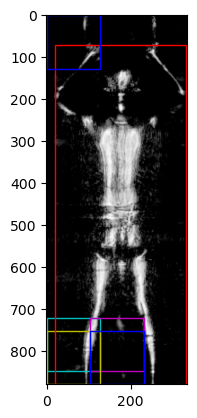

In [21]:

def add_bbox(x1, y1, x2, y2, color, ax, linewidth=1):
    box_x, box_y, box_w, box_h = x1, y1, abs(x2-x1), abs(y2-y1)
    rect = patches.Rectangle((box_x, box_y), box_w, box_h, linewidth=linewidth, 
                             edgecolor=color, facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)



ax = plt.subplot(111)
ax.imshow(255-img, cmap="Greys")

ids = [21, 22, 24, 25]
x1,x2,y1,y2 =indices[ids[0]]
add_bbox(x1,y1,x2,y2, 'c', ax, linewidth=1)
x1,x2,y1,y2 =indices[ids[1]]
add_bbox(x1,y1,x2,y2, 'm', ax, linewidth=1)
x1,x2,y1,y2 =indices[ids[2]]
add_bbox(x1,y1,x2,y2, 'y', ax, linewidth=1)
x1,x2,y1,y2 =indices[ids[3]]
add_bbox(x1,y1,x2,y2, 'b', ax, linewidth=1)

gx1,gy1,gx2,gy2 = 21, 72, 331, 881
add_bbox(gx1,gy1,gx2,gy2, 'r', ax)

gx1,gx2,gy1,gy2 = (0, 128, 0, 128)
add_bbox(gx1,gy1,gx2,gy2, 'b', ax)

plt.show()

In [13]:
df[df['labels']==1].describe()

,Unnamed: 0,scores,labels,x1,x2,y1,y2
count,5111.000000,5111.000000,5111.0,5111.000000,5111.000000,5111.000000,5111.000000
mean,5099.270593,0.129203,1.0,533.032479,661.032479,131.632753,259.632753
std,2932.409062,0.070070,0.0,189.149330,189.149330,80.298884,80.298884
min,2.000000,0.000000,1.0,0.000000,128.000000,0.000000,128.000000
25%,2562.500000,0.081899,1.0,412.000000,540.000000,103.000000,231.000000
50%,5089.000000,0.115857,1.0,515.000000,643.000000,103.000000,231.000000
75%,7654.000000,0.158606,1.0,721.000000,849.000000,206.000000,334.000000
max,10221.000000,0.861003,1.0,752.000000,880.000000,207.000000,335.000000


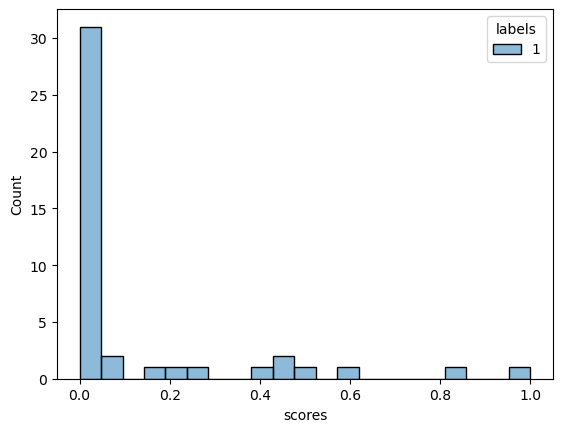

In [8]:
sns.histplot(df[df['labels']==1], x='scores', hue='labels')
plt.show()

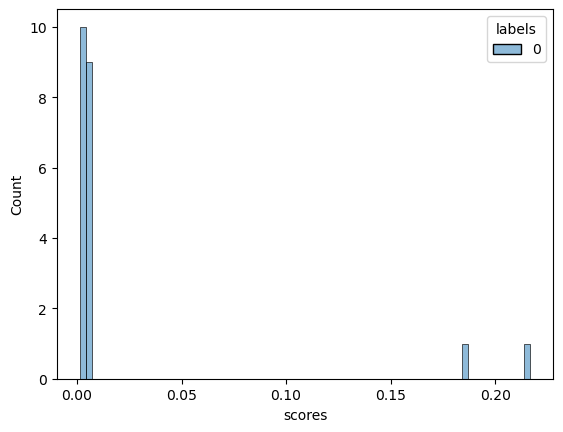

In [9]:
sns.histplot(df[df['labels']==0], x='scores', hue='labels')
plt.show()